In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

warnings.filterwarnings("ignore")

In [127]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [128]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [129]:
test.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [130]:
train.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [131]:
test.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken'],
      dtype='object')

In [132]:
train.dtypes

EmpID                        int64
EmpName                     object
LanguageOfCommunication     object
Age                          int64
Gender                      object
JobProfileIDApplyingFor     object
HighestDegree               object
DegreeBranch                object
GraduatingInstitute         object
LatestDegreeCGPA             int64
YearsOfExperince             int64
GraduationYear               int64
CurrentCTC                   int64
ExpectedCTC                  int64
MartialStatus               object
EmpScore                     int64
CurrentDesignation          object
CurrentCompanyType          object
DepartmentInCompany         object
TotalLeavesTaken             int64
BiasInfluentialFactor       object
FitmentPercent             float64
dtype: object

In [133]:
test.dtypes

EmpID                       int64
EmpName                    object
LanguageOfCommunication    object
Age                         int64
Gender                     object
JobProfileIDApplyingFor    object
HighestDegree              object
DegreeBranch               object
GraduatingInstitute        object
LatestDegreeCGPA            int64
YearsOfExperince            int64
GraduationYear              int64
CurrentCTC                  int64
ExpectedCTC                 int64
MartialStatus              object
EmpScore                    int64
CurrentDesignation         object
CurrentCompanyType         object
DepartmentInCompany        object
TotalLeavesTaken            int64
dtype: object

In [134]:
train.shape

(13645, 22)

In [135]:
test.shape

(8745, 20)

In [136]:
train["FitmentPercent"].value_counts(normalize=True)

91.20    0.000953
91.59    0.000953
91.04    0.000879
71.80    0.000879
85.75    0.000879
           ...   
62.22    0.000073
84.16    0.000073
39.10    0.000073
61.28    0.000073
64.67    0.000073
Name: FitmentPercent, Length: 4578, dtype: float64

In [182]:
train["result"] = train["FitmentPercent"].apply(lambda x: 0 if x<75.88 else 1)

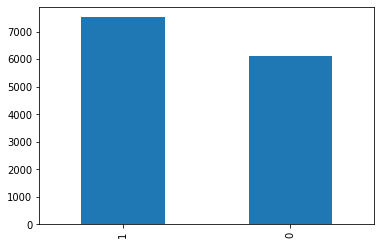

In [183]:
train["result"].value_counts().plot.bar()

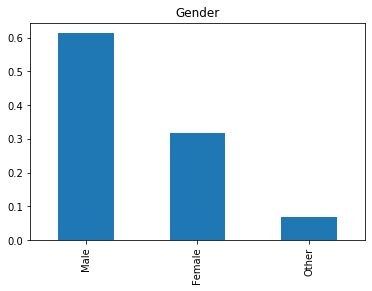

In [184]:
train["Gender"].value_counts(normalize=True).plot.bar(title="Gender")
plt.show()

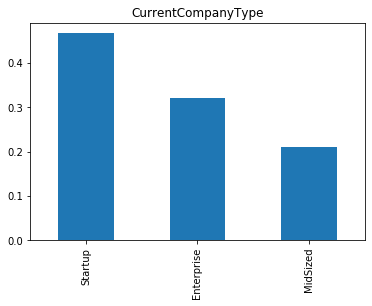

In [185]:
train["CurrentCompanyType"].value_counts(normalize=True).plot.bar(title="CurrentCompanyType")
plt.show()

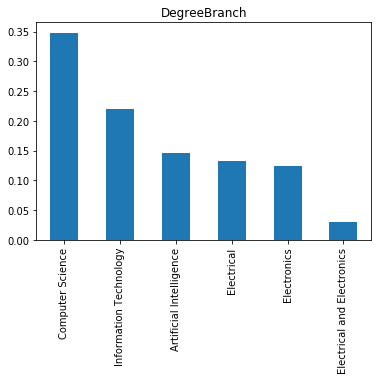

In [186]:
train["DegreeBranch"].value_counts(normalize=True).plot.bar(title="DegreeBranch")
plt.show()

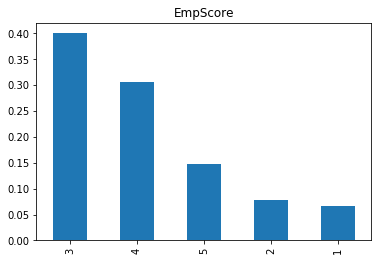

In [187]:
train["EmpScore"].value_counts(normalize=True).plot.bar(title="EmpScore")
plt.show()

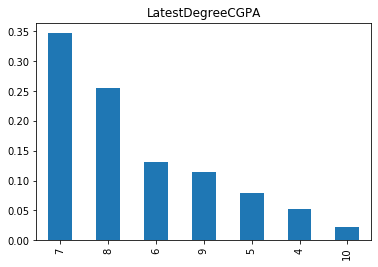

In [188]:
train["LatestDegreeCGPA"].value_counts(normalize=True).plot.bar(title="LatestDegreeCGPA")
plt.show()

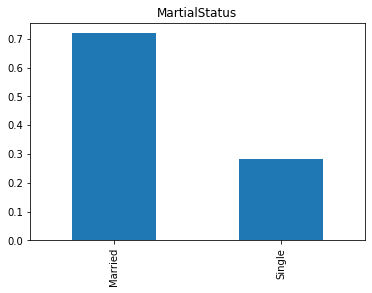

In [189]:
train["MartialStatus"].value_counts(normalize=True).plot.bar(title="MartialStatus")
plt.show()

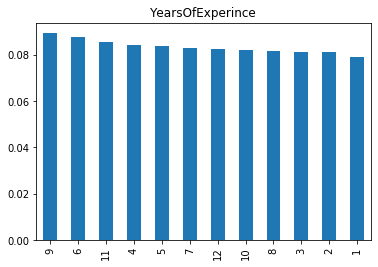

In [190]:
train["YearsOfExperince"].value_counts(normalize=True).plot.bar(title="YearsOfExperince")
plt.show()

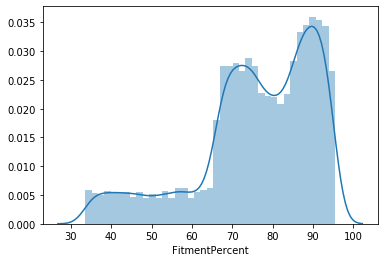

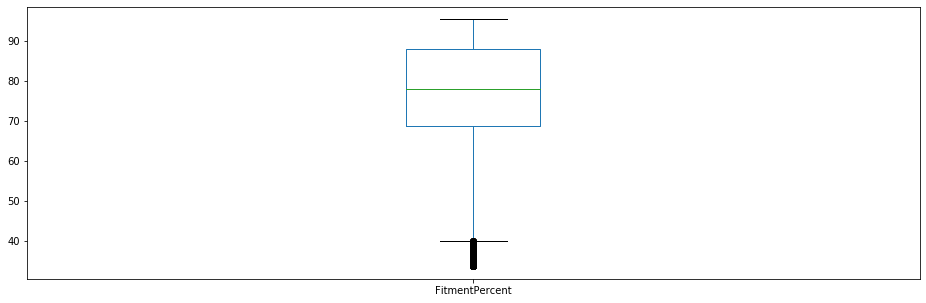

In [191]:
sns.distplot(train["FitmentPercent"])
plt.show()
train["FitmentPercent"].plot.box(figsize=(16,5))
plt.show()

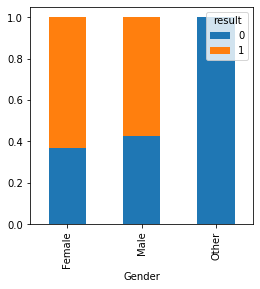

In [192]:
Gender=pd.crosstab(train["Gender"],train["result"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

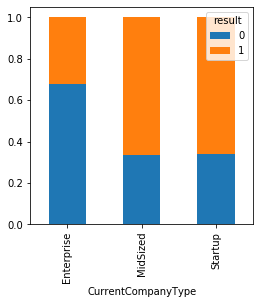

In [193]:
CurrentCompanyType=pd.crosstab(train["CurrentCompanyType"],train["result"])
CurrentCompanyType.div(CurrentCompanyType.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [194]:
train.dtypes

EmpID                         int64
EmpName                      object
LanguageOfCommunication      object
Age                           int64
Gender                     category
JobProfileIDApplyingFor      object
HighestDegree              category
DegreeBranch               category
GraduatingInstitute          object
LatestDegreeCGPA           category
YearsOfExperince           category
GraduationYear                int64
CurrentCTC                    int64
ExpectedCTC                   int64
MartialStatus              category
EmpScore                   category
CurrentDesignation           object
CurrentCompanyType         category
DepartmentInCompany          object
TotalLeavesTaken              int64
BiasInfluentialFactor        object
FitmentPercent              float64
result                        int64
Gender_cat                     int8
DegreeBranch_cat               int8
EmpScore_cat                   int8
CurrentCompanyType_cat         int8
HighestDegree_cat           

In [195]:
train["Gender"] = train["Gender"].astype('category')
train["Gender_cat"] = train["Gender"].cat.codes

train["DegreeBranch"] = train["DegreeBranch"].astype('category')
train["DegreeBranch_cat"] = train["DegreeBranch"].cat.codes

train["EmpScore"] = train["EmpScore"].astype('category')
train["EmpScore_cat"] = train["EmpScore"].cat.codes

train["CurrentCompanyType"] = train["CurrentCompanyType"].astype('category')
train["CurrentCompanyType_cat"] = train["CurrentCompanyType"].cat.codes

train["HighestDegree"] = train["HighestDegree"].astype('category')
train["HighestDegree_cat"] = train["HighestDegree"].cat.codes

train["LatestDegreeCGPA"] = train["LatestDegreeCGPA"].astype('category')
train["LatestDegreeCGPA_cat"] = train["LatestDegreeCGPA"].cat.codes

train["MartialStatus"] = train["MartialStatus"].astype('category')
train["MartialStatus_cat"] = train["MartialStatus"].cat.codes

train["YearsOfExperince"] = train["YearsOfExperince"].astype('category')
train["YearsOfExperince_cat"] = train["YearsOfExperince"].cat.codes

In [196]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,FitmentPercent,result,Gender_cat,DegreeBranch_cat,EmpScore_cat,CurrentCompanyType_cat,HighestDegree_cat,LatestDegreeCGPA_cat,MartialStatus_cat,YearsOfExperince_cat
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,95.40,1,1,2,4,0,0,3,0,11
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,67.09,0,1,0,4,1,0,3,0,2
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,91.26,1,0,1,4,1,7,2,1,5
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,72.29,0,0,5,4,2,1,1,0,5
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,86.34,1,1,1,4,0,2,4,0,1


In [197]:
# input
#x = train.iloc[:, [4,6,7,9,10,14,15,17]].values
x=  train.iloc[:, [23,24,25,26,27,28,29,30]].values
print(x)
# output
y = train.iloc[:, 22].values
print(y)

[[ 1  2  4 ...  3  0 11]
 [ 1  0  4 ...  3  0  2]
 [ 0  1  4 ...  2  1  5]
 ...
 [ 1  0  3 ...  4  1 10]
 [ 1  2  3 ...  0  1  0]
 [ 1  2  2 ...  3  1 11]]
[1 0 1 ... 0 1 1]


In [198]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [199]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])


[[ 0.4340063  -0.16324128 -2.29346305 -0.16567184 -0.90731425  0.66816607
  -0.62553852  1.30348721]
 [ 0.4340063   1.47018246 -0.37331518 -0.16567184  0.79861992 -0.07583212
  -0.62553852  0.71926871]
 [ 0.4340063  -0.70771586  0.58675876 -1.3073014  -0.05434717 -0.81983032
  -0.62553852 -0.74127753]
 [-1.3124296   1.47018246  1.5468327   0.97595773 -0.90731425  2.15616247
   1.59862258 -1.61760527]
 [ 0.4340063   1.47018246 -0.37331518  0.97595773 -0.90731425 -0.07583212
  -0.62553852  0.13505022]
 [-1.3124296   1.47018246  0.58675876  0.97595773 -0.48083071  0.66816607
  -0.62553852 -0.15705903]
 [ 0.4340063   0.3812333  -0.37331518 -0.16567184  2.07807056 -0.07583212
  -0.62553852 -1.32549602]
 [ 0.4340063   0.92570788 -0.37331518 -1.3073014  -0.90731425  1.41216427
  -0.62553852  1.30348721]
 [-1.3124296   1.47018246 -0.37331518 -1.3073014   0.79861992  0.66816607
  -0.62553852 -0.44916828]
 [ 2.1804422  -0.16324128 -0.37331518  0.97595773 -0.90731425  1.41216427
  -0.62553852 -0.

In [200]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
y_pred = classifier.predict(xtest)


In [202]:
len(list(y_pred))

3412

In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmpID                    13645 non-null  int64   
 1   EmpName                  13645 non-null  object  
 2   LanguageOfCommunication  13645 non-null  object  
 3   Age                      13645 non-null  int64   
 4   Gender                   13645 non-null  category
 5   JobProfileIDApplyingFor  13645 non-null  object  
 6   HighestDegree            13645 non-null  category
 7   DegreeBranch             13645 non-null  category
 8   GraduatingInstitute      13645 non-null  object  
 9   LatestDegreeCGPA         13645 non-null  category
 10  YearsOfExperince         13645 non-null  category
 11  GraduationYear           13645 non-null  int64   
 12  CurrentCTC               13645 non-null  int64   
 13  ExpectedCTC              13645 non-null  int64   
 14  Martia

In [204]:
print(train['Gender_cat'].value_counts(dropna=False))
print(train['DegreeBranch_cat'].value_counts(dropna=False))
print(train['EmpScore_cat'].value_counts(dropna=False))
print(train['CurrentCompanyType_cat'].value_counts(dropna=False))
print(train['HighestDegree_cat'].value_counts(dropna=False))
print(train['LatestDegreeCGPA_cat'].value_counts(dropna=False))
print(train['MartialStatus_cat'].value_counts(dropna=False))
print(train['YearsOfExperince_cat'].value_counts(dropna=False))


1    8376
0    4326
2     943
Name: Gender_cat, dtype: int64
1    4749
5    2993
0    2001
2    1803
4    1699
3     400
Name: DegreeBranch_cat, dtype: int64
2    5462
3    4184
4    2025
1    1064
0     910
Name: EmpScore_cat, dtype: int64
2    6373
0    4395
1    2877
Name: CurrentCompanyType_cat, dtype: int64
0    5619
4    2026
1    1634
6    1579
2    1358
3     665
7     624
5     140
Name: HighestDegree_cat, dtype: int64
3    4738
4    3480
2    1779
5    1554
1    1089
0     713
6     292
Name: LatestDegreeCGPA_cat, dtype: int64
0    9810
1    3835
Name: MartialStatus_cat, dtype: int64
8     1219
5     1196
10    1166
3     1146
4     1142
6     1130
11    1123
9     1116
7     1114
2     1109
1     1108
0     1076
Name: YearsOfExperince_cat, dtype: int64


In [205]:
df=train
df = pd.get_dummies(df, columns=['Gender_cat', 'DegreeBranch_cat','EmpScore_cat','CurrentCompanyType_cat','HighestDegree_cat','LatestDegreeCGPA_cat','MartialStatus_cat','YearsOfExperince_cat'], drop_first=True)

df

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,YearsOfExperince_cat_2,YearsOfExperince_cat_3,YearsOfExperince_cat_4,YearsOfExperince_cat_5,YearsOfExperince_cat_6,YearsOfExperince_cat_7,YearsOfExperince_cat_8,YearsOfExperince_cat_9,YearsOfExperince_cat_10,YearsOfExperince_cat_11
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,0,0,0,0,0,0,0,0,0,1
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,1,0,0,0,0,0,0,0,0,0
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,0,0,0,1,0,0,0,0,0,0
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,0,0,0,1,0,0,0,0,0,0
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13640,19504,Perley,English,25,Female,JR87525,Dual MBA,Electrical,Tier 2,7,...,0,0,0,0,0,0,0,0,0,0
13641,17071,Randall,Native,29,Other,JR87525,Dual M.Tech,Computer Science,Tier 1,7,...,0,0,0,1,0,0,0,0,0,0
13642,6659,Raphael,Hindi,37,Male,JR88873,M.Tech,Artificial Intelligence,Tier 1,8,...,0,0,0,0,0,0,0,0,1,0
13643,5986,Reed,Hindi,24,Male,JR87525,B.Tech,Electrical,Tier 2,4,...,0,0,0,0,0,0,0,0,0,0


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmpID                     13645 non-null  int64   
 1   EmpName                   13645 non-null  object  
 2   LanguageOfCommunication   13645 non-null  object  
 3   Age                       13645 non-null  int64   
 4   Gender                    13645 non-null  category
 5   JobProfileIDApplyingFor   13645 non-null  object  
 6   HighestDegree             13645 non-null  category
 7   DegreeBranch              13645 non-null  category
 8   GraduatingInstitute       13645 non-null  object  
 9   LatestDegreeCGPA          13645 non-null  category
 10  YearsOfExperince          13645 non-null  category
 11  GraduationYear            13645 non-null  int64   
 12  CurrentCTC                13645 non-null  int64   
 13  ExpectedCTC               13645 non-null  int6

In [207]:
cat_column=["Gender_cat_1", "Gender_cat_2" ,"DegreeBranch_cat_1"     
 ,"DegreeBranch_cat_2"
,"DegreeBranch_cat_3"   
,"DegreeBranch_cat_4"   
,"DegreeBranch_cat_5"  
,"EmpScore_cat_1"     
,"EmpScore_cat_2"    
,"EmpScore_cat_3"   
,"EmpScore_cat_4"   
,"CurrentCompanyType_cat_1"   
,"CurrentCompanyType_cat_2" 
,"HighestDegree_cat_1"    
,"HighestDegree_cat_2"     
,"HighestDegree_cat_3"      
,"HighestDegree_cat_4"        
,"HighestDegree_cat_5"     
,"HighestDegree_cat_6"     
,"HighestDegree_cat_7"      
,"LatestDegreeCGPA_cat_1"  
,"LatestDegreeCGPA_cat_2"     
,"LatestDegreeCGPA_cat_3"  
,"LatestDegreeCGPA_cat_4"   
,"LatestDegreeCGPA_cat_5"   
,"LatestDegreeCGPA_cat_6"      
,"MartialStatus_cat_1"        
,"YearsOfExperince_cat_1"    
,"YearsOfExperince_cat_2"     
,"YearsOfExperince_cat_3"   
,"YearsOfExperince_cat_4"     
,"YearsOfExperince_cat_5"      
,"YearsOfExperince_cat_6"    
,"YearsOfExperince_cat_7"  
,"YearsOfExperince_cat_8"  
,"YearsOfExperince_cat_9"  
,"YearsOfExperince_cat_10"  
,"YearsOfExperince_cat_11" ]

In [208]:
cat_column.sort()
cat_column

['CurrentCompanyType_cat_1',
 'CurrentCompanyType_cat_2',
 'DegreeBranch_cat_1',
 'DegreeBranch_cat_2',
 'DegreeBranch_cat_3',
 'DegreeBranch_cat_4',
 'DegreeBranch_cat_5',
 'EmpScore_cat_1',
 'EmpScore_cat_2',
 'EmpScore_cat_3',
 'EmpScore_cat_4',
 'Gender_cat_1',
 'Gender_cat_2',
 'HighestDegree_cat_1',
 'HighestDegree_cat_2',
 'HighestDegree_cat_3',
 'HighestDegree_cat_4',
 'HighestDegree_cat_5',
 'HighestDegree_cat_6',
 'HighestDegree_cat_7',
 'LatestDegreeCGPA_cat_1',
 'LatestDegreeCGPA_cat_2',
 'LatestDegreeCGPA_cat_3',
 'LatestDegreeCGPA_cat_4',
 'LatestDegreeCGPA_cat_5',
 'LatestDegreeCGPA_cat_6',
 'MartialStatus_cat_1',
 'YearsOfExperince_cat_1',
 'YearsOfExperince_cat_10',
 'YearsOfExperince_cat_11',
 'YearsOfExperince_cat_2',
 'YearsOfExperince_cat_3',
 'YearsOfExperince_cat_4',
 'YearsOfExperince_cat_5',
 'YearsOfExperince_cat_6',
 'YearsOfExperince_cat_7',
 'YearsOfExperince_cat_8',
 'YearsOfExperince_cat_9']

In [209]:
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['result'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['result'].value_counts(normalize=True))
print()
print(df_test['result'].value_counts(normalize=True))

(10916, 61)
(2729, 61)

1    0.551301
0    0.448699
Name: result, dtype: float64

1    0.551484
0    0.448516
Name: result, dtype: float64


In [210]:
numeric_cols = ['Age']
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [211]:
def get_features_and_target_arrays(df, numeric_cols, cat_column, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_column].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['result']
    return X, y
X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_column, scaler)

In [212]:
X.shape

(10916, 39)

In [213]:

clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_column, scaler)

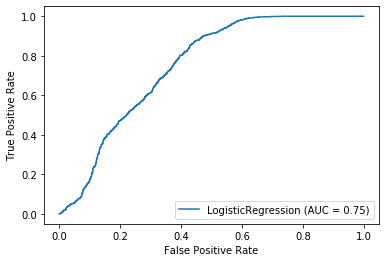

In [215]:
plot_roc_curve(clf, X_test, y_test)

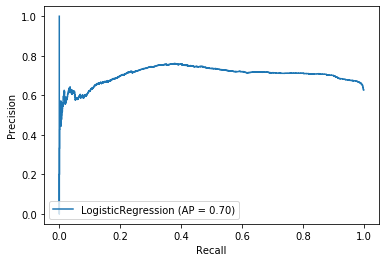

In [216]:
plot_precision_recall_curve(clf, X_test, y_test)

In [217]:
X_test

array([[ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.08288635],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.33985522],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.17408252],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.88166842],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.85379295],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.85379295]])

In [218]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [224]:
test_prob

array([5.89596373e-01, 6.34096019e-01, 9.95267794e-08, ...,
       2.40935067e-01, 1.66899977e-07, 2.74320704e-01])

In [220]:
test_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [221]:
for i,j,k in zip(test_prob,test_pred,y_test):
    print(i,j,k)

0.5895963728632428 1 1
0.6340960194203038 1 1
9.952677941036571e-08 0 0
0.7742077779850904 1 0
1.9530839211554944e-07 0 0
0.7908754452082003 1 0
0.7467828474788314 1 1
0.6058424194501051 1 0
0.6085910460947193 1 1
0.8178286771612869 1 0
3.7190423825808866e-08 0 0
0.689898228366436 1 0
0.6619541443817315 1 1
3.2751720065571955e-08 0 0
0.6404712731957186 1 0
0.8388659424831006 1 1
0.708767238532974 1 1
1.8998746719753176e-08 0 0
0.7842493779953753 1 1
0.7884665195016566 1 1
0.8113296662094674 1 1
0.42435984056360204 0 1
4.5510429358822654e-08 0 0
0.6148505600894076 1 1
0.6313437268483002 1 1
0.5625008681976016 1 1
7.671681223279204e-08 0 0
0.6737544705789167 1 0
0.5096945960481153 1 1
0.7635253533677321 1 1
0.6178016989956806 1 1
0.6145217660461796 1 0
0.642738747657098 1 1
0.3171116031263198 0 1
0.64317369270546 1 0
0.6200820117322149 1 1
0.7449614584156127 1 0
0.23659488705456924 0 0
0.7268396196315157 1 0
0.5931459643459734 1 1
0.4750612557978862 0 1
0.44054160906714773 0 0
0.74765622

0.6163678547765906 1 1
0.6029029342176949 1 0
0.24563498271616496 0 0
0.2530507898655695 0 0
0.6648855841193171 1 1
0.6346858989097519 1 1
9.223459773152956e-08 0 0
0.45154135648574295 0 0
0.7768618976732657 1 0
0.27087802548683115 0 1
0.6266372547469301 1 1
0.7809711483411864 1 1
0.2491489673973256 0 1
0.5877422195532841 1 1
1.53990449636415e-08 0 0
9.361731687940642e-08 0 0
0.2485494541806106 0 0
0.6771078797714555 1 1
0.618105383146183 1 1
9.024358278951915e-08 0 0
0.7056977119865651 1 1
0.6140386693765135 1 1
0.601826160522981 1 1
0.613267653219896 1 0
0.7814921734635 1 1
0.6220606378907122 1 0
0.6986952051449811 1 0
0.3962028374961871 0 1
1.34294474771384e-07 0 0
0.6575329232436276 1 0
0.7877386487836342 1 1
0.6303987603794075 1 1
7.170561142257235e-08 0 0
0.705146713806203 1 1
0.19877858199597956 0 0
0.24404981362483297 0 0
0.7854454466244974 1 1
0.23425078860225218 0 0
0.5678994095693929 1 1
0.5994270305129992 1 1
0.43925866921820317 0 0
8.758300916616886e-08 0 0
0.5335277710137

0.2201194373575762 0 0
0.6871698710699103 1 1
0.781474539648663 1 1
0.6040276883342782 1 1
0.43910710389448765 0 0
0.6577173620466231 1 1
0.7762175844899352 1 1
0.29222772204161784 0 0
0.6934416677959157 1 1
0.6944931729714799 1 0
0.7519835734361786 1 0
0.7511756582464865 1 0
0.6577798183356101 1 1
0.5821112559269683 1 0
0.7701737955080801 1 1
0.6303391237007641 1 1
0.6984445474394508 1 1
7.128179102341327e-08 0 0
0.8160770431017402 1 1
0.7813650996114799 1 1
0.6047750357981305 1 1
0.8160193935296711 1 0
0.6195327196384932 1 1
0.42995078397071507 0 1
0.6704308107386585 1 1
0.8354227627604265 1 1
0.836207087452545 1 0
0.2617705748938441 0 0
0.40236536714108817 0 0
0.6131146325191961 1 1
0.8163987051659348 1 0
0.47245935113243825 0 0
0.3849521479677935 0 0
1.920256622924437e-07 0 0
0.4831553158516848 0 1
0.3209643028303821 0 1
7.812320236723664e-08 0 0
0.2779346863576121 0 0
0.2666987566087544 0 0
0.482056491468961 0 1
0.782779154387893 1 1
0.2900238303139994 0 0
0.5025343778363983 1 0
1

0.7554926519303384 1 1
0.6844259722716977 1 0
0.6975164573411614 1 1
0.7457249111118268 1 1
0.6324706267372416 1 0
0.6084778549631623 1 1
1.7276377068329665e-07 0 0
0.5975854046242741 1 0
0.3128067532405079 0 1
0.3218176176124748 0 0
0.62032045112214 1 1
0.45178154639940543 0 0
0.8039670909055575 1 1
0.6510597150215663 1 1
0.4170260806912995 0 1
0.7905979268461366 1 1
0.2326893232708357 0 0
0.45817908382585976 0 1
0.5164475770001932 1 0
0.8098895059813719 1 1
0.6061179751179813 1 1
0.7711512555334313 1 1
0.6824949341915889 1 1
0.23073325203045209 0 0
0.7772797368945421 1 1
0.6151229650468291 1 1
0.693327839460792 1 1
0.6633027360304188 1 0
8.159621434858902e-08 0 0
0.48498933952390183 0 1
0.6146321314746395 1 0
0.6886973899825742 1 0
0.31593205199508373 0 1
0.3122875116849511 0 1
0.7642301925826668 1 0
0.7940984639426891 1 1
0.6214991057163397 1 0
0.2462763627919882 0 0
0.80415661623554 1 1
0.6234960327556729 1 0
0.642377297008038 1 1
0.7619774100360135 1 0
0.8151892170175736 1 1
0.768

0.7372695212894104 1 1
0.8260755333928707 1 0
0.8223330646226824 1 0
0.6121975105530842 1 0
0.6424469674545223 1 1
0.686498827498569 1 1
0.6451961761364713 1 1
0.6138211115167136 1 0
0.7796477649544002 1 0
0.3773329393994629 0 0
0.49389948785620036 0 0
0.4824671573450707 0 1
0.29124398750065467 0 0
0.8118263808102572 1 1
0.24896219374885978 0 0
0.44817643126800044 0 1
0.8364567723161431 1 0
0.7634866675499585 1 1
0.44006819102454325 0 0
0.5483718699699911 1 1
0.6232616875532544 1 1
0.6739581038154255 1 0
0.6716658580330422 1 1
0.38839293727031166 0 1
0.7443192338516089 1 1
0.6855813122020734 1 1
0.8389410430487336 1 0
0.8077315093990755 1 1
0.6742660249649169 1 1
0.620048602931679 1 1
1.738300021182122e-08 0 0
0.5778021188136816 1 1
0.5928258855808441 1 1
0.6564582276823686 1 1
0.7718270848051241 1 1
0.6201373077615766 1 0
0.61409464225508 1 1
0.6588255060664647 1 1
0.19170828031501955 0 0
0.5884286018323801 1 1
0.3839050881804048 0 0
0.7846317985990429 1 1
0.4327611124348167 0 0
0.801

0.2891092955837709 0 0
8.098657087843739e-08 0 0
0.40987293389851465 0 1
0.6544573748057095 1 0
0.24276715070311947 0 0
0.7006798114894438 1 1
0.635515125492261 1 1
0.3188174654077394 0 1
0.5821112559269683 1 1
0.6762175203503796 1 0
0.7594959263703449 1 1
0.8041047984485511 1 1
0.45749501027092737 0 0
0.22914518376620405 0 0
0.7835749889767132 1 1
0.5989231966126625 1 1
0.4757900101058622 0 0
0.7696320037040429 1 1
0.7544713019445508 1 1
0.5329598909991489 1 1
8.863659054542243e-08 0 0
0.6249236560913489 1 1
0.8043990925487383 1 1
0.38948349953059225 0 1
0.5998367303713045 1 0
0.8121681378985367 1 0
0.25490888030038716 0 0
0.6472135562836647 1 1
0.6671946177177868 1 1
1.911944335109935e-08 0 0
6.466951253421255e-08 0 0
0.8047834399498226 1 1
0.2281586775794766 0 0
0.8472914557216896 1 0
0.8027218032292187 1 1
0.2882714527944898 0 1
0.8018206742614524 1 1
0.3364230140881085 0 1
0.7859821412719826 1 0
0.6757686927998382 1 1
0.4668597852026121 0 1
0.8162840250931033 1 1
0.372778151939940

In [222]:
accuracy_score(y_test,test_pred)

0.7149138878710151

In [181]:
train["FitmentPercent"].describe()

count    13645.000000
mean        75.880093
std         14.894207
min         33.530000
25%         68.720000
50%         78.110000
75%         87.990000
max         95.500000
Name: FitmentPercent, dtype: float64

In [226]:
test.shape


(8745, 20)

In [227]:
test["Gender"] = test["Gender"].astype('category')
test["Gender_cat"] = test["Gender"].cat.codes

test["DegreeBranch"] = test["DegreeBranch"].astype('category')
test["DegreeBranch_cat"] = test["DegreeBranch"].cat.codes

test["EmpScore"] = test["EmpScore"].astype('category')
test["EmpScore_cat"] = test["EmpScore"].cat.codes

test["CurrentCompanyType"] = test["CurrentCompanyType"].astype('category')
test["CurrentCompanyType_cat"] = test["CurrentCompanyType"].cat.codes

test["HighestDegree"] = test["HighestDegree"].astype('category')
test["HighestDegree_cat"] = test["HighestDegree"].cat.codes

test["LatestDegreeCGPA"] = test["LatestDegreeCGPA"].astype('category')
test["LatestDegreeCGPA_cat"] = test["LatestDegreeCGPA"].cat.codes

test["MartialStatus"] = test["MartialStatus"].astype('category')
test["MartialStatus_cat"] = test["MartialStatus"].cat.codes

test["YearsOfExperince"] = test["YearsOfExperince"].astype('category')
test["YearsOfExperince_cat"] = test["YearsOfExperince"].cat.codes

In [228]:
df=test
df = pd.get_dummies(df, columns=['Gender_cat', 'DegreeBranch_cat','EmpScore_cat','CurrentCompanyType_cat','HighestDegree_cat','LatestDegreeCGPA_cat','MartialStatus_cat','YearsOfExperince_cat'], drop_first=True)

df

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,YearsOfExperince_cat_2,YearsOfExperince_cat_3,YearsOfExperince_cat_4,YearsOfExperince_cat_5,YearsOfExperince_cat_6,YearsOfExperince_cat_7,YearsOfExperince_cat_8,YearsOfExperince_cat_9,YearsOfExperince_cat_10,YearsOfExperince_cat_11
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,...,0,0,1,0,0,0,0,0,0,0
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,...,0,0,0,0,0,0,0,0,0,1
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,...,0,0,0,0,0,0,0,0,0,0
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,...,0,0,0,0,0,0,0,0,1,0
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,14758,Matt,English,26,Female,JR85289,B.Tech,Computer Science,Tier 1,10,...,1,0,0,0,0,0,0,0,0,0
8741,23544,Salvatore,Hindi,27,Male,JR85289,MS,Electrical,Tier 1,10,...,0,0,0,0,0,0,0,0,0,0
8742,16175,Adrian,English,27,Male,JR85289,B.Tech,Computer Science,Tier 2,7,...,0,1,0,0,0,0,0,0,0,0
8743,18458,Ambrose,English,33,Male,JR79193,MS,Electrical and Electronics,Tier 1,7,...,0,0,0,0,1,0,0,0,0,0


In [230]:
def get_features_and_target_arrays(df, numeric_cols, cat_column, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_column].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    #y = df['result']
    return X
X_test= get_features_and_target_arrays(df, numeric_cols, cat_column, scaler)

In [231]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [234]:
type(test_prob)

numpy.ndarray

In [241]:
result=df[["EmpID"]]

In [242]:
result["FitmentPercent"]=test_prob

In [243]:
result.head()

,EmpID,FitmentPercent
0,5664,0.370426
1,23568,0.415941
2,21490,0.621215
3,8363,0.374193
4,6165,0.775876


In [244]:
result.to_csv("result.csv")